#**1. Install library yg digunakan**

In [ ]:
import numpy as np # Untuk Komputasi Numerik
import pandas as pd # Untuk Manipulasi Data
import matplotlib.pyplot as plt # Untuk Memvisualisasikan Data

#**2 . Menampilkan dataset**

In [ ]:
df = pd.read_csv("sample_data/Recipe Reviews and User Feedback Dataset.csv")
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


#**3. Pre-Processing Data**

In [ ]:
import textblob
from textblob import TextBlob

import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

review = df["text"].astype("string")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def pre_process(Review_Text):
    # Case Folding: Lowercase
    Review_Text = str(Review_Text).lower()

    # Case Folding: Removing Number
    Review_Text = re.sub(r"\d+", "", Review_Text)

    # Removing Punctuation
    All_punct = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for elements in Review_Text:
      if elements in All_punct:
        Review_Text = Review_Text.replace(elements, "")

    #Case Folding: Removing Whitespace
    Review_Text = Review_Text.strip()

    #Separating Sentences with Split () Method
    pisah = Review_Text.split()

    #Tokenizing: Word Tokenizing Using NLTK Module
    tokens = nltk.tokenize.word_tokenize(Review_Text)

    removed = []
    for t in tokens:
      if t not in tokens:
        removed.append(t)

    return Review_Text

df['ReviewClean'] = df['text'].apply(lambda x:pre_process(x))

df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,ReviewClean
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",i tweaked it a little removed onions because o...
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,i have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",in your introduction you mentioned cream chees...
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,wonderful i made this for a chilistew night di...


#**4. Proses PeLabelan**

In [ ]:
# Perform a simple sentiment analysis
data_review = list(df['ReviewClean'].astype(str))
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(review)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')
df.head()

Hasil Analisis Data:
Positif = 16044
Netral = 1021
Negatif = 1117

Total Data : 18182


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,ReviewClean
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ...",i tweaked it a little removed onions because o...
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...,bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...,i have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee...",in your introduction you mentioned cream chees...
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,wonderful i made this for a chilistew night di...


#**5. Menambahkan kolom Status Sentimen (Positif/Netral/Negatif)**

In [ ]:
df['klasifikasi'] = status
df.tail()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,ReviewClean,klasifikasi
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...,this strawberry cake has been a family favorit...,Positif
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...,pi received endless compliments on this cake i...,Positif
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...,this cake was delicious and so moist i didnt n...,Positif
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...,i just made this too it is wonderful as for ...,Positif
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my...",omg you must make this cake i made it for my s...,Positif


#**6. Data Visualization**

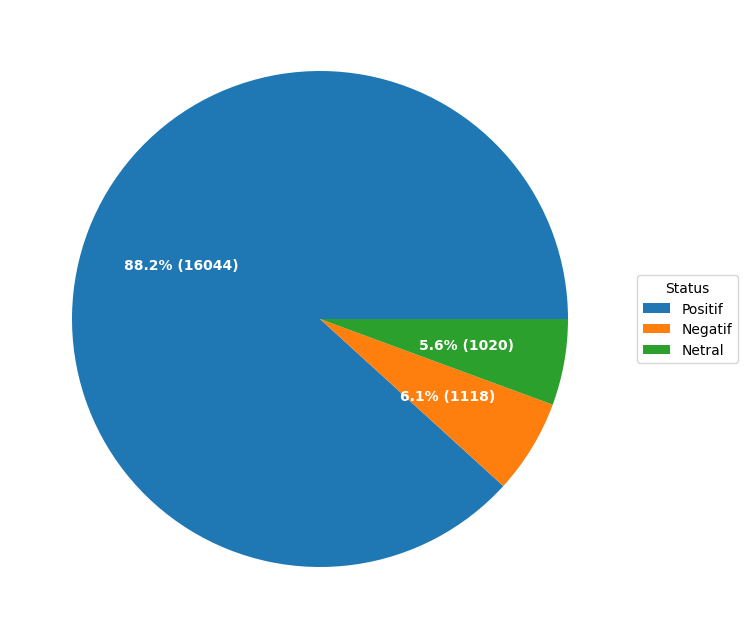

In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

**Kesimpulan :**

> Terdapat lebih banyak sentimen positif untuk resep masakan, dibandingkan dengan sentimen negatif dan netral



# **7. Klasifikasi Data Dengan Metode Logistic Regression dan SVM**

In [ ]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(df['ReviewClean'])
X = cv.transform(df['ReviewClean'])
y = df['klasifikasi']

In [ ]:
#Build Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [ ]:
#Find the best value of C in logistic regression

for c in [0.01, 0.05, 0.25, 0.5, 1]:

    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print('Accuracy for C=%s: %s'
         % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8891943909815783
Accuracy for C=0.05: 0.9175144349738795


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.25: 0.943084960131977


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for C=0.5: 0.9447346714324993
Accuracy for C=1: 0.9444597195490789


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Find the best value of C in support vector

for c in [0.01, 0.05, 0.25, 0.5, 1]:

    sv = SVC(C=c)
    sv.fit(X_train, y_train)
    print('Accuracy for C=%s: %s'
         % (c, accuracy_score(y_test, sv.predict(X_test))))

Accuracy for C=0.01: 0.8875446796810558
Accuracy for C=0.05: 0.8875446796810558
Accuracy for C=0.25: 0.8875446796810558
Accuracy for C=0.5: 0.8875446796810558
Accuracy for C=1: 0.889744294748419


In [ ]:
#Choose C=1 to build the final model for Logistic Regression.
final_model_lr = LogisticRegression(C=1)
final_model_lr.fit(X, y)
print('Akurasi Logistic Regression: %s' %accuracy_score(y_test, final_model_lr.predict(X_test)))

Akurasi Logistic Regression: 0.995875721748694


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Choose C=1 to build the final model for Support Vector.
final_model_sv = SVC(C=1)
final_model_sv.fit(X, y)
print('Akurasi SVM: %s' %accuracy_score(y_test, final_model_sv.predict(X_test)))

Akurasi SVM: 0.919164146274402


#**8. Menyimpan tabel baru yang ada kolom klasifikasi/label sentimen**

In [ ]:
df.to_csv('labeled_text.csv', encoding='utf8', index=False)
